https://happiness-report.s3.amazonaws.com/2020/WHR20.pdf \
https://en.wikipedia.org/wiki/World_Happiness_Report

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # viz 
import matplotlib.pyplot as plt #viz
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('./data/WHR20_DataForFigure2.1.csv',index_col="Country name")

In [4]:
df.head()

Regional indicator  Ladder score  Standard error of ladder score  \
Country name                                                                    
Finland          Western Europe        7.8087                        0.031156   
Denmark          Western Europe        7.6456                        0.033492   
Switzerland      Western Europe        7.5599                        0.035014   
Iceland          Western Europe        7.5045                        0.059616   
Norway           Western Europe        7.4880                        0.034837   

              upperwhisker  lowerwhisker  Logged GDP per capita  \
Country name                                                      
Finland           7.869766      7.747634              10.639267   
Denmark           7.711245      7.579955              10.774001   
Switzerland       7.628528      7.491272              10.979933   
Iceland           7.621347      7.387653              10.772559   
Norway            7.556281      7.419719              11.087804   

              Social support  Healthy life expectancy  \
Country name                                            
Finland             0.954330                71.900825   
Denmark             0.955991                72.402504   
Switzerland         0.942847                74.102448   
Iceland             0.974670                73.000000   
Norway              0.952487                73.200783   

              Freedom to make life choices  Generosity  \
Country name                                             
Finland                           0.949172   -0.059482   
Denmark                           0.951444    0.066202   
Switzerland                       0.921337    0.105911   
Iceland                           0.948892    0.246944   
Norway                            0.955750    0.134533   

              Perceptions of corruption  Ladder score in Dystopia  \
Country name                                                        
Finland                        0.195445                  1.972317   
Denmark                        0.168489                  1.972317   
Switzerland                    0.303728                  1.972317   
Iceland                        0.711710                  1.972317   
Norway                         0.263218                  1.972317   

              Explained by: Log GDP per capita  Explained by: Social support  \
Country name                                                                   
Finland                               1.285190                      1.499526   
Denmark                               1.326949                      1.503449   
Switzerland                           1.390774                      1.472403   
Iceland                               1.326502                      1.547567   
Norway                                1.424207                      1.495173   

              Explained by: Healthy life expectancy  \
Country name                                          
Finland                                    0.961271   
Denmark                                    0.979333   
Switzerland                                1.040533   
Iceland                                    1.000843   
Norway                                     1.008072   

              Explained by: Freedom to make life choices  \
Country name                                               
Finland                                         0.662317   
Denmark                                         0.665040   
Switzerland                                     0.628954   
Iceland                                         0.661981   
Norway                                          0.670201   

              Explained by: Generosity  \
Country name                             
Finland                       0.159670   
Denmark                       0.242793   
Switzerland                   0.269056   
Iceland                       0.362330   
Norway                        0.287985   

              Explain

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Finland to Afghanistan
Data columns (total 19 columns):
Regional indicator                            153 non-null object
Ladder score                                  153 non-null float64
Standard error of ladder score                153 non-null float64
upperwhisker                                  153 non-null float64
lowerwhisker                                  153 non-null float64
Logged GDP per capita                         153 non-null float64
Social support                                153 non-null float64
Healthy life expectancy                       153 non-null float64
Freedom to make life choices                  153 non-null float64
Generosity                                    153 non-null float64
Perceptions of corruption                     153 non-null float64
Ladder score in Dystopia                      153 non-null float64
Explained by: Log GDP per capita              153 non-null float64
Explained by: So

In [7]:
df.describe()

Ladder score  Standard error of ladder score  upperwhisker  \
count     153.00000                      153.000000    153.000000   
mean        5.47324                        0.053538      5.578175   
std         1.11227                        0.018183      1.096823   
min         2.56690                        0.025902      2.628270   
25%         4.72410                        0.040698      4.826248   
50%         5.51500                        0.050606      5.607728   
75%         6.22850                        0.060677      6.363886   
max         7.80870                        0.120590      7.869766   

       lowerwhisker  Logged GDP per capita  Social support  \
count    153.000000             153.000000      153.000000   
mean       5.368304               9.295706        0.808721   
std        1.128631               1.201588        0.121453   
min        2.505530               6.492642        0.319460   
25%        4.603149               8.350645        0.737217   
50%        5.430644               9.456313        0.829204   
75%        6.138881              10.265124        0.906747   
max        7.747634              11.450681        0.974670   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               153.000000                    153.000000  153.000000   
mean                 64.445529                      0.783360   -0.014568   
std                   7.057848                      0.117786    0.151809   
min                  45.200001                      0.396573   -0.300907   
25%                  58.961712                      0.714839   -0.127015   
50%                  66.305145                      0.799805   -0.033665   
75%                  69.289192                      0.877709    0.085429   
max                  76.804581                      0.974998    0.560664   

       Perceptions of corruption  Ladder score in Dystopia  \
count                 153.000000              1.530000e+02   
mean                    0.733120              1.972317e+00   
std                     0.175172              1.336643e-15   
min                     0.109784              1.972317e+00   
25%                     0.683019              1.972317e+00   
50%                     0.783122              1.972317e+00   
75%                     0.849151              1.972317e+00   
max                     0.935585              1.972317e+00   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        153.000000                    153.000000   
mean                           0.868771                      1.155607   
std                            0.372416                      0.286866   
min                            0.000000                      0.000000   
25%                            0.575862                      0.986718   
50%                            0.918549                      1.203987   
75%                            1.169229                      1.387139   
max                            1.536676                      1.547567   

       Explained by: Healthy life expectancy  \
count                             153.000000   
mean                                0.692869   
std                                 0.254094   
min                                 0.000000   
25%                                 0.495443   
50%                                 0.759818   
75%                                 0.867249   
max                                 1.137814   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  153.000000                153.000000   
mean                                     0.463583                  0.189375   
std                                      0.141172                  0.100401   
min                                      0.000000                  0.000000   
25%                                      0.381457                  0.115006   
50%              

In [8]:
df_clean = df.loc[:,"Regional indicator":"Perceptions of corruption"].drop(df.loc[:,"Standard error of ladder score":"lowerwhisker"], axis=1)
df_clean.head()

Regional indicator  Ladder score  Logged GDP per capita  \
Country name                                                           
Finland          Western Europe        7.8087              10.639267   
Denmark          Western Europe        7.6456              10.774001   
Switzerland      Western Europe        7.5599              10.979933   
Iceland          Western Europe        7.5045              10.772559   
Norway           Western Europe        7.4880              11.087804   

              Social support  Healthy life expectancy  \
Country name                                            
Finland             0.954330                71.900825   
Denmark             0.955991                72.402504   
Switzerland         0.942847                74.102448   
Iceland             0.974670                73.000000   
Norway              0.952487                73.200783   

              Freedom to make life choices  Generosity  \
Country name                                             
Finland                           0.949172   -0.059482   
Denmark                           0.951444    0.066202   
Switzerland                       0.921337    0.105911   
Iceland                           0.948892    0.246944   
Norway                            0.955750    0.134533   

              Perceptions of corruption  
Country name                             
Finland                        0.195445  
Denmark                        0.168489  
Switzerland                    0.303728  
Iceland                        0.711710  
Norway                         0.263218

In [14]:
print("Number of Regions: ")
df_clean["Regional indicator"].nunique()


Number of Regions: 


10

In [15]:
print("Name of Regions:\n ")
df_clean["Regional indicator"].unique()

Name of Regions:
 


array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [16]:
print("Value Count of Regions:\n")
df_clean["Regional indicator"].value_counts()

Value Count of Regions:



Sub-Saharan Africa                    39
Latin America and Caribbean           21
Western Europe                        21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

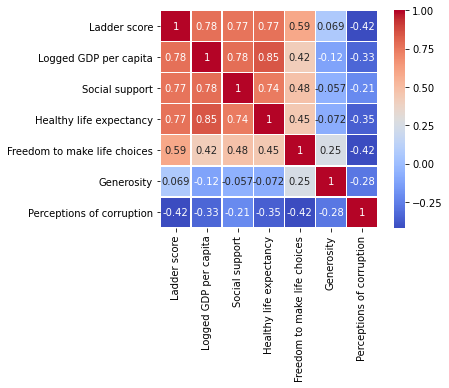

In [18]:
#calculating correlation
cor = df_clean.corr()

#heatmap as below
sns.heatmap(cor, square = True, cmap="coolwarm",annot=True,linewidths=0.5)

plt.show()

In [20]:
fig = px.scatter(df_clean, x="Logged GDP per capita", y="Ladder score", size="Social support", color="Regional indicator", hover_name=df_clean.index, size_max=20)

fig.show()

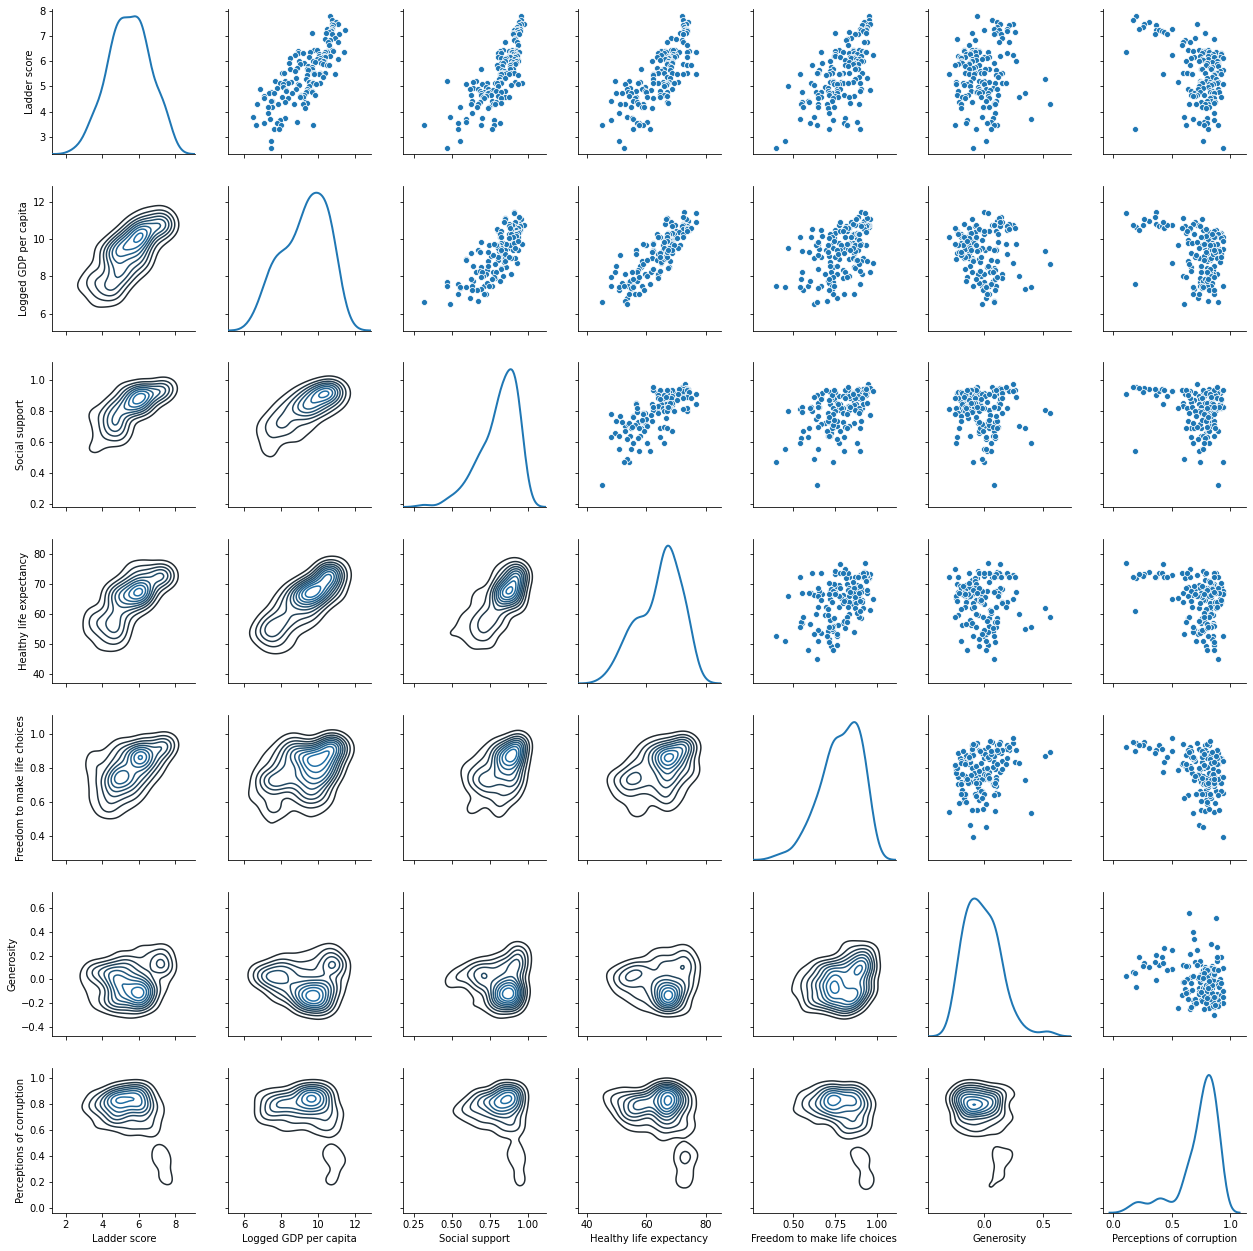

In [25]:
disp = sns.PairGrid(df_clean, diag_sharey=False)
disp.map_upper(sns.scatterplot)
disp.map_lower(sns.kdeplot)
disp.map_diag(sns.kdeplot, lw=2)

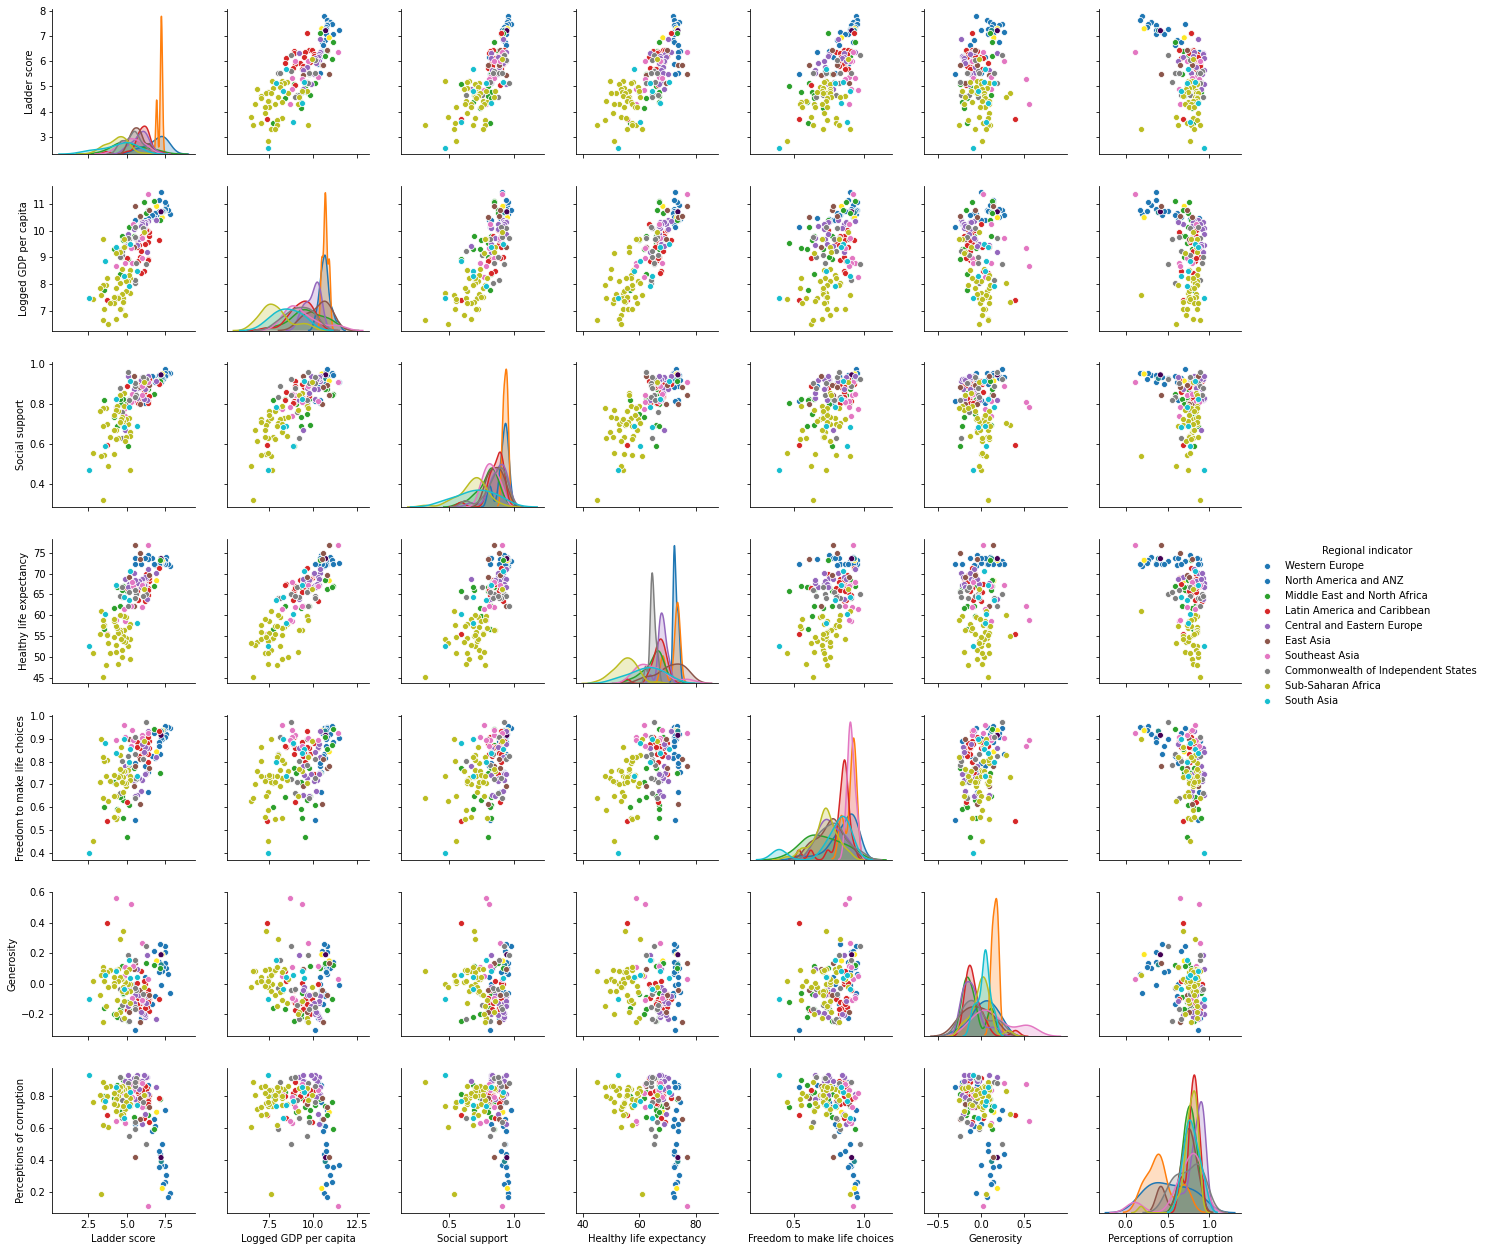

In [26]:
sns.pairplot(df_clean, hue = "Regional indicator")

In [29]:
data = pd.read_csv('./data/WHR20_DataForFigure2.1.csv')

data = dict(type = 'choropleth', 
           locations = data['Country name'],
           locationmode = 'country names',
           z = data['Ladder score'], 
           text = data['Country name'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score 2020', 
             geo = dict(showframe = False,
                       showocean = False,
                       showlakes = True,
                       showcoastlines = True,
                       projection = {'type': 'natural earth'}))
map_ = go.Figure(data = data, layout=layout)
iplot(map_)

In [31]:
data_m = pd.read_csv('./data/WHR20_DataForFigure2.1.csv')

data_m = data_m.drop(['upperwhisker','lowerwhisker'],axis=1)
data_m.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [32]:

data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
Country name                                  153 non-null object
Regional indicator                            153 non-null object
Ladder score                                  153 non-null float64
Standard error of ladder score                153 non-null float64
Logged GDP per capita                         153 non-null float64
Social support                                153 non-null float64
Healthy life expectancy                       153 non-null float64
Freedom to make life choices                  153 non-null float64
Generosity                                    153 non-null float64
Perceptions of corruption                     153 non-null float64
Ladder score in Dystopia                      153 non-null float64
Explained by: Log GDP per capita              153 non-null float64
Explained by: Social support                  153 non-null float64
Explained by: Healthy life

In [33]:
x = data_m.iloc[:,3:13]
y = data_m.iloc[:,2:3]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print("score of training is {:.2f}".format(LR.score(X_train,y_train)))
print("score of test is {:.2f}".format(LR.score(X_test,y_test)))

score of training is 0.76
score of test is 0.68
